# Random Forest 

- Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting.
- It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

### Steps Involved:
- Step 1 − First, start with the selection of random samples from a given dataset.

- Step 2 − Next, this algorithm will construct a decision tree for every sample. Then it will get the prediction result from every decision tree.

- Step 3 − In this step, voting will be performed for every predicted result.

- Step 4 − At last, select the most voted prediction result as the final prediction result.

<img src = 'rfa.jpg' height = 250px width = auto>

# Pros and Cons of Random Forest Algorithm:

### Pros:

- It overcomes the problem of overfitting by averaging or combining the results of different decision trees.

- Random forests work well for a large range of data items than a single decision tree does.

- Random forest has less variance then single decision tree.

- Random forests are very flexible and possess very high accuracy.

- Random Forest algorithms maintains good accuracy even a large proportion of the data is missing.
##### Scaling of data does not require in random forest algorithm. It maintains good accuracy even after providing data without scaling.


### Cons:
- Complexity is the main disadvantage of Random forest algorithms.

- Construction of Random forests are much harder and time-consuming than decision trees.

- More computational resources are required to implement Random Forest algorithm.

- It is less intuitive in case when we have a large collection of decision trees.

- The prediction process using random forests is very time-consuming in comparison with other algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

### Building a regressor model.

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
def r_forest(n, objective):
    '''
    n = Number of estimators.
    objective = X_value whose y_value has to be predicted.
    '''
    regressor = RandomForestRegressor(n_estimators = n, random_state = 0)
    regressor.fit(X,y)
    return regressor.predict(np.array(objective).reshape(-1,1))

In [6]:
# Creating a list of tuples containing varyig values of n_estimators & corresponding predicted values.
mylist = []
for ii in range(10,500+1,10):
    mylist.append((ii,r_forest(ii,6.5)[0]))

In [7]:
mylist[:5]

[(10, 167000.0),
 (20, 166000.0),
 (30, 164333.33333333334),
 (40, 161250.0),
 (50, 161200.0)]

In [8]:
# Separation for plot.
x_grid,y_grid = np.array(mylist).T

In [9]:
# Getting the index for which the predicted value is the closest to 160k.
epsilon = np.abs(y_grid-(np.ones(len(y_grid))*160000))
min_index = np.where(epsilon == min(epsilon))[0]
min_index

array([14], dtype=int64)

### Visualization using plot:
- Here, we see for what value of 'n_estimators', the predicted value of the salary will be the closest to 160k.

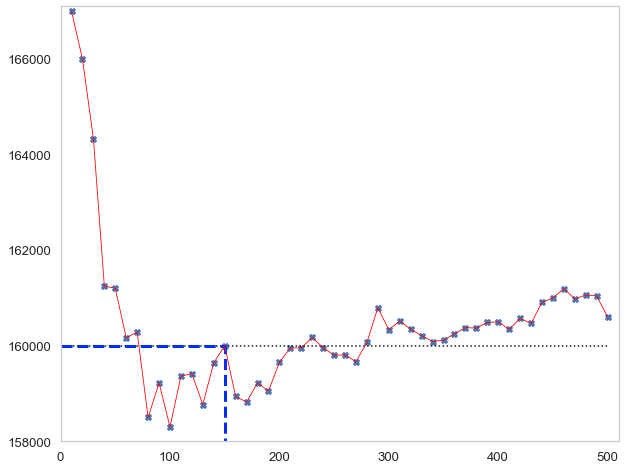

In [10]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2)

plt.scatter(x_grid, y_grid, marker = 'X')
plt.plot(x_grid, y_grid, color = 'red', linewidth = 0.8)
plt.hlines(160000, 0,501, linestyles = 'dotted')
plt.hlines(y_grid[min_index], 0, x_grid[min_index]+1, linestyle = 'dashed',
           linewidth = 3, color = '#002ffa')
plt.vlines(x_grid[min_index], 157500, y_grid[min_index]+1, linestyle = 'dashed',
           linewidth = 3, color = '#002ffa')


plt.xlim(0,510)
plt.ylim(158000, max(y_grid)+100)
plt.grid(0)
plt.show()

In [11]:
print('The best predicted salary for level 6.5 is ', y_grid[min_index][0], '.\n',
     'For this, we use n_estimators = ',int( x_grid[min_index][0]), '.')

The best predicted salary for level 6.5 is  160000.0 .
 For this, we use n_estimators =  150 .


### Testing for level = 9.

In [13]:
r_forest(150, 9)[0].round(2)

480666.67

In [14]:
dataset.iloc[-2,:]

Position    C-level
Level             9
Salary       500000
Name: 8, dtype: object

#### Checking whether we can do any better prediction than this.

In [15]:
def minimum_index(objective,truevalue):
    # Creating a list of tuples containing varyig values of n_estimators & corresponding predicted values.
    mylist = []
    for ii in range(10,500+1,10):
        mylist.append((ii,r_forest(ii,objective)[0]))
    
    # Separation for plot.
    x_grid,y_grid = np.array(mylist).T

    # Getting the index for which the predicted value is the closest to 160k.
    epsilon = np.abs(y_grid-(np.ones(len(y_grid))*truevalue))
    min_index = np.where(epsilon == min(epsilon))[0]
    return (min_index, x_grid[min_index], y_grid[min_index])

In [31]:
minimum_index(9,500000)

(array([3], dtype=int64), array([40.]), array([502500.]))

##### This means, for determining the best predicted value for level 9, we set n_estimators = 40 and doing so, we get the optimal predicted salary as 502500.

### Determining the optimal number of estimators for all the levels.

In [17]:
true_values = dataset.iloc[:,2].values
objectives = dataset.iloc[:,1].values

optimal_estimators = []
for ii in range(len(objectives)):
    optimal_estimators.append(minimum_index(objectives[ii], true_values[ii])[1] )
    
optimal_estimators

[array([10.]),
 array([150.]),
 array([240.]),
 array([70.]),
 array([60.]),
 array([480.]),
 array([20.]),
 array([ 10., 200.]),
 array([40.]),
 array([10.])]

#### Adding optimal estimators into the original dataset.

In [68]:
dataset['opt_estimators'] = [optimal_estimators[ii][0] for ii in range(len(optimal_estimators))]
dataset['opt_estimators'].values

array([ 10., 150., 240.,  70.,  60., 480.,  20.,  10.,  40.,  10.])

#### Adding the best estimates into the original dataset.

In [35]:
best_prediction = []
objectives = dataset.iloc[:,1].values

for ii in range(len(dataset['opt_estimators'].values)):
    regressor1 = RandomForestRegressor(n_estimators = int(dataset['opt_estimators'].values[ii]),
                                       random_state = 0)
    regressor1.fit(X,y)
    best_prediction.append(regressor1.predict(np.array(objectives[ii]).reshape(-1,1)))
    
dataset['best_prediction'] = [best_prediction[ii][0].round(2) for ii in range(len(best_prediction))]

#### Optimal number of estimators for each level visualized in a bar plot.

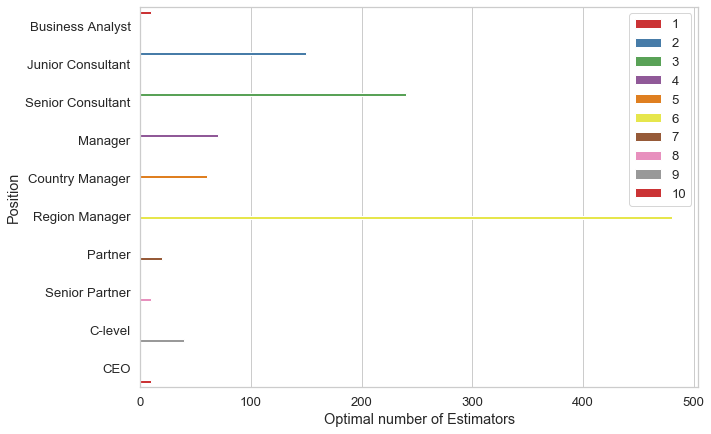

In [67]:
plt.figure(figsize = (10,7))
labels = [str(ii) for ii in np.arange(1,11)]
ax = sns.barplot(x = [optimal_estimators[ii][0] for ii in range(len(optimal_estimators))],
            y = dataset['Position'], hue = dataset.Level, palette = 'Set1')

#h,l = ax.get_legend_handles_labels()

plt.xlabel('Optimal number of Estimators')
plt.legend(loc = 'upper right')
plt.show()

In [41]:
dataset['Difference'] = -dataset['Salary'] + dataset['best_prediction']
dataset

,Position,Level,Salary,opt_estimators,best_prediction,Difference
0,Business Analyst,1,45000,10.0,46000.00,1000.00
1,Junior Consultant,2,50000,150.0,50066.67,66.67
2,Senior Consultant,3,60000,240.0,59875.00,-125.00
3,Manager,4,80000,70.0,80142.86,142.86
4,Country Manager,5,110000,60.0,109833.33,-166.67
5,Region Manager,6,150000,480.0,143895.83,-6104.17
6,Partner,7,200000,20.0,200000.00,0.00
7,Senior Partner,8,300000,10.0,305000.00,5000.00
8,C-level,9,500000,40.0,502500.00,2500.00
9,CEO,10,1000000,10.0,850000.00,-150000.00


# The End.